# Self Organizing Map

### Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the dataset

In [3]:
dataset = pd.read_csv('pulsar_stars.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

### Feature Scaling

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

### Training the SOM

In [6]:
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 8, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

### Visualizing the results

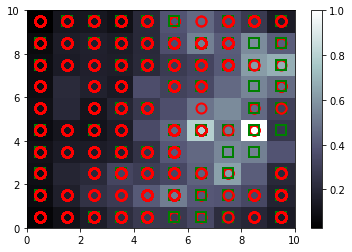

In [7]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']

for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)

In [8]:
show()

### Finding the frauds

In [15]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(7,3)], mappings[(7,7)]), axis = 0)
frauds = sc.inverse_transform(frauds)
# change the float format to %.3f

In [16]:
frauds

array([[ 78.953125  ,  46.68626327,   1.42265173,   2.4923815 ,
         48.41137124,  38.32395364,  -0.18475864,  -0.46676858],
       [ 70.0234375 ,  35.28067478,   1.15765719,   4.54669237,
          3.00334448,  19.57538355,   7.9544361 ,  71.96015886],
       [ 80.9921875 ,  34.28932416,   0.7176152 ,   4.00123351,
          2.6638796 ,  17.38143975,   8.12320238,  76.32992616],
       [ 81.9296875 ,  34.51770008,   0.82934638,   3.88745932,
          3.34949833,  20.12947035,   8.30447776,  79.76471417],
       [ 73.6328125 ,  35.46121805,   1.15360658,   4.16108248,
          2.09949833,  13.05747392,  10.01359091, 140.8941513 ],
       [ 72.3203125 ,  37.21935266,   0.88500598,   3.06011954,
          2.48745819,  15.3319134 ,   8.51507678,  92.9009492 ],
       [ 81.8203125 ,  35.39209693,   1.01584713,   3.73302379,
          2.5493311 ,  21.18243912,   8.80888092,  79.95013023],
       [ 71.78125   ,  33.99079322,   1.20137569,   5.05736651,
          2.47993311,  18.0621029